In [1]:
import numpy as np
#import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

# Converting text file into dataframe

In [2]:
path = "G:\My Drive\Python_data_classes\projects_after_GA\obj_det_automl\yoloToPascalvoc\data"

In [3]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [4]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]
images_name = [x for x in os.listdir(path) if x.endswith('.jpeg')]

In [5]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

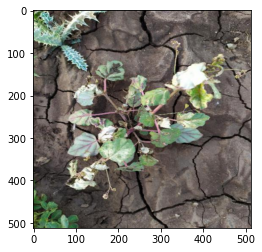

In [6]:
#checking our conversion is working or not
#plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [ ]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    print(id)
    label = open(id[:-5]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    print(label)
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[78:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1
    

In [8]:
df.head()

image_name object     x_cen     y_cen         w         h
0  agri_0_9354.jpeg      1  0.477539  0.550781  0.708984  0.628906
1  agri_0_9354.jpeg      1  0.177734  0.145508  0.351562  0.287109
2  agri_0_7574.jpeg      0  0.537109  0.621094  0.699219  0.589844
3  agri_0_8960.jpeg      1  0.463867  0.420898  0.724609  0.541016
4   agri_0_417.jpeg      1  0.507812  0.476562  0.984375   0.65625

# Converting dataframe into Pascal-voc format

In [9]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [10]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 
    

100%|██████████| 2072/2072 [00:04<00:00, 452.49it/s]


In [11]:
pascal_voc

filename width height class xmin ymin xmax ymax
0     agri_0_9354.jpeg   512    512  weed   63  120  425  442
1     agri_0_9354.jpeg   512    512  weed    0    1  180  148
2     agri_0_7574.jpeg   512    512  crop   95  167  453  469
3     agri_0_8960.jpeg   512    512  weed   52   76  422  353
4      agri_0_417.jpeg   512    512  weed    7   75  511  411
...                ...   ...    ...   ...  ...  ...  ...  ...
2067  agri_0_2825.jpeg   512    512  weed   16  144  202  303
2068  agri_0_2825.jpeg   512    512  weed  291   94  471  304
2069  agri_0_9252.jpeg   512    512  weed  247  194  384  331
2070  agri_0_9252.jpeg   512    512  weed   37  104  179  246
2071  agri_0_8141.jpeg   512    512  crop   27   51  460  498

[2072 rows x 8 columns]

# Visualizing labels

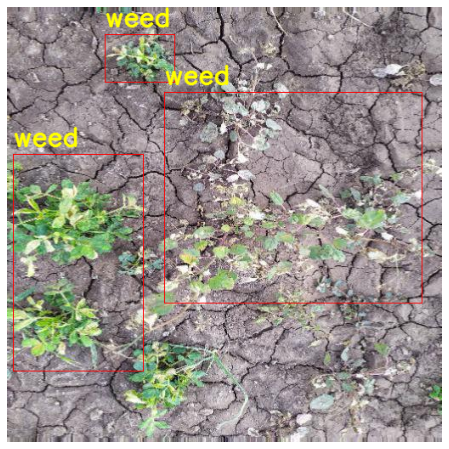

In [12]:
any_index_number = 55 #change this number for different images
test_img = cv2.cvtColor(cv2.imread(path+pascal_voc.loc[any_index_number,'filename']),cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):
    
    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('off')
plt.show()

# Saving label file

In [13]:

pascal_voc.to_csv('pascal_voc_format.csv',index=False)